In [2]:
%matplotlib inline

In [2]:
from pyspark import SparkContext, SparkConf
from pyspark.mllib.evaluation import BinaryClassificationMetrics
from pyspark.mllib.regression import LabeledPoint as DataPoint
from pyspark.mllib.classification import LogisticRegressionWithSGD as LogisticRegression
import sys
from sklearn.metrics import roc_curve
import numpy as np
import matplotlib.pyplot as plt
import csv

In [7]:
TEST_DATA = "../data/preprocessed_train_12K.csv"
iteration = 100
def mytest(x):
    def ParseData(row):
        
        data = [float(feature) for feature in row.split(",")]
        #print data[x:y], x,y
        return DataPoint(data[0], data[0:2])
    
    data = sc.textFile(TEST_DATA).map(ParseData)
    train, test = data.randomSplit([0.8, 0.2], seed = 11L)
    #train.cache()

    LR = LogisticRegression.train(train, iteration)
    predictions = LR.predict(test.map(lambda x: x.features))
    labelsAndPredictions = test.map(lambda lp: lp.label).zip(predictions)
    testErr = labelsAndPredictions.filter(lambda (v, p): v != p).count() / float(test.count())
    print "Err=%d"% testErr
    return testErr

In [9]:
TEST_DATA = "../data/preprocessed_train_12K.csv"
iteration = 100

def mytest(x):
    def ParseData(row):
        data = [float(feature) for feature in row.split(",")]
        return DataPoint(data[0], data[x:x+1])
    
    data = sc.textFile(TEST_DATA).map(ParseData)
    train, test = data.randomSplit([0.8, 0.2], seed = 11L)
    train.cache()
    #print train.map(lambda x: x.features).mean()
    #print train.map(lambda x: x.features).stdev()
    LR = LogisticRegression.train(train, iteration)
    predictions = LR.predict(test.map(lambda x: x.features))
    labelsAndPredictions = test.map(lambda lp: lp.label).zip(predictions)
    testErr = labelsAndPredictions.filter(lambda (v, p): v != p).count() / float(test.count())
    print x, testErr
test = []
for i in xrange(5, 497):
    test.append(mytest(i))

 5 0.31568296796
6 0.298313659359
7 0.24502529511
8 0.24502529511
9 0.24502529511
10 0.24502529511
11 0.24502529511
12 0.24502529511


Py4JJavaError: An error occurred while calling z:org.apache.spark.api.python.PythonRDD.collectAndServe.
: org.apache.spark.SparkException: Job aborted due to stage failure: Task 0 in stage 596.0 failed 1 times, most recent failure: Lost task 0.0 in stage 596.0 (TID 1147, localhost): ExecutorLostFailure (executor driver exited caused by one of the running tasks) Reason: Executor heartbeat timed out after 2443036 ms
Driver stacktrace:
	at org.apache.spark.scheduler.DAGScheduler.org$apache$spark$scheduler$DAGScheduler$$failJobAndIndependentStages(DAGScheduler.scala:1431)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1419)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$abortStage$1.apply(DAGScheduler.scala:1418)
	at scala.collection.mutable.ResizableArray$class.foreach(ResizableArray.scala:59)
	at scala.collection.mutable.ArrayBuffer.foreach(ArrayBuffer.scala:47)
	at org.apache.spark.scheduler.DAGScheduler.abortStage(DAGScheduler.scala:1418)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGScheduler$$anonfun$handleTaskSetFailed$1.apply(DAGScheduler.scala:799)
	at scala.Option.foreach(Option.scala:236)
	at org.apache.spark.scheduler.DAGScheduler.handleTaskSetFailed(DAGScheduler.scala:799)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.doOnReceive(DAGScheduler.scala:1640)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1599)
	at org.apache.spark.scheduler.DAGSchedulerEventProcessLoop.onReceive(DAGScheduler.scala:1588)
	at org.apache.spark.util.EventLoop$$anon$1.run(EventLoop.scala:48)
	at org.apache.spark.scheduler.DAGScheduler.runJob(DAGScheduler.scala:620)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1832)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1845)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1858)
	at org.apache.spark.SparkContext.runJob(SparkContext.scala:1929)
	at org.apache.spark.rdd.RDD$$anonfun$collect$1.apply(RDD.scala:927)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:150)
	at org.apache.spark.rdd.RDDOperationScope$.withScope(RDDOperationScope.scala:111)
	at org.apache.spark.rdd.RDD.withScope(RDD.scala:316)
	at org.apache.spark.rdd.RDD.collect(RDD.scala:926)
	at org.apache.spark.api.python.PythonRDD$.collectAndServe(PythonRDD.scala:405)
	at org.apache.spark.api.python.PythonRDD.collectAndServe(PythonRDD.scala)
	at sun.reflect.GeneratedMethodAccessor76.invoke(Unknown Source)
	at sun.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.lang.reflect.Method.invoke(Method.java:606)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:231)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:381)
	at py4j.Gateway.invoke(Gateway.java:259)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:133)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.GatewayConnection.run(GatewayConnection.java:209)
	at java.lang.Thread.run(Thread.java:745)


In [ ]:
test = []
for i in xrange(5, 497):
    test.append(mytest(i))
print test

Err=0
Err=0
Err=0
Err=0
Err=0
Err=0
Err=0
Err=0
Err=0
Err=0
Err=0

In [28]:
with open("choice.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerow(test)

In [4]:
LR.clearThreshold()
scores = LR.predict(test.map(lambda x: x.features))
labelsAndScores = test.map(lambda lp: lp.label).zip(scores)
labelsAndScores_list = labelsAndScores.collect()


In [5]:
labelsAndScores_list = np.array(labelsAndScores_list)

In [6]:
print labelsAndScores_list.shape

(11811, 2)


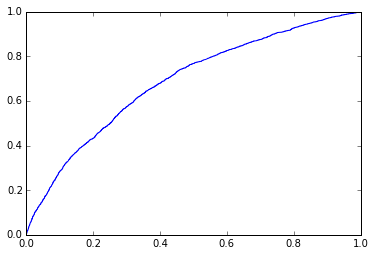

In [18]:
tpr, fpr, th = roc_curve(labelsAndScores_list[:,0].flatten(), labelsAndScores_list[:,1].flatten())
plt.figure(1)
plt.plot(tpr, fpr)

In [10]:
print labelsAndScores_list[:,0].flatten()

[ 1.  0.  0. ...,  0.  1.  0.]
